# Math 134C Homework 4
## Matt Eimers: 56652700

### Problem 12.1

In [134]:
import pandas as pd
from scipy.stats import norm
import numpy as np

def european_call_price_and_greeks(S, E, T, r, sigma):
    # Calculate d1 and d2
    d1 = (np.log(S / E) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    # Calculate the price of the call option
    price = S * norm.cdf(d1) - E * np.exp(-r * T) * norm.cdf(d2)

    # Calculate Greeks
    delta = norm.cdf(d1)
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    theta = -S * norm.pdf(d1) * sigma / (2 * np.sqrt(T)) - r * E * np.exp(-r * T) * norm.cdf(d2)
    vega = S * np.sqrt(T) * norm.pdf(d1)
    rho = T * E * np.exp(-r * T) * norm.cdf(d2)

    return price, delta, gamma, vega, theta, rho , d1 , d2

def european_put_price_and_greeks(S, E, T, r, sigma):
    # Calculate d1 and d2
    d1 = (np.log(S / E) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    # Calculate the price of the call option
    price = -(S * norm.cdf(-d1)) + (E * np.exp(-r * T) * norm.cdf(-d2))

    # Calculate Greeks
    delta = norm.cdf(d1) - 1
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    theta = -S * norm.pdf(d1) * sigma / (2 * np.sqrt(T)) + r * E * np.exp(-r * T) * norm.cdf(-d2)
    vega = S * np.sqrt(T) * norm.pdf(d1)
    rho = -T * E * np.exp(-r * T) * norm.cdf(-d2)

    return price, delta, gamma, vega, theta, rho ,  d1 , d2

# Example usage
S0 = 41  # Current stock price
E = 40  # Strike price
T = 0.25   # Time to expiration (1 year)
r = 0.08  # Risk-free interest rate
sigma = 0.3  # Volatility of the stock

price_Call, delta_Call, gamma_Call, vega_Call, theta_Call, rho_Call, call_d1, call_d2 = european_call_price_and_greeks(S0, E, T, r, sigma)
price_Put, delta_Put, gamma_Put,  vega_Put,theta_Put, rho_Put, put_d1, put_d2= european_put_price_and_greeks(S0, E, T, r, sigma)
#print(f"Call Price: {price_Call:.2f}, Delta: {delta_Call:.4f}, Gamma: {gamma_Call:.4f},  Vega: {vega_Call:.4f}, Theta: {theta_Call:.4f}, Rho: {rho_Call:.4f}")
#print(f"Put Price: {price_Put:.2f}, Delta: {delta_Put:.4f}, Gamma: {gamma_Put:.4f},  Vega: {vega_Put:.4f}, Theta: {theta_Put:.4f}, Rho: {rho_Put:.4f}")
results = pd.DataFrame({
    'Metric': ['Price', 'Delta', 'Gamma', 'Vega', 'Theta', 'Rho', 'd1', 'd2'],
    'Call Option': [price_Call, delta_Call, gamma_Call,  vega_Call, theta_Call,  rho_Call, call_d1, call_d2],
    'Put Option': [price_Put, delta_Put, gamma_Put,  vega_Put, theta_Put,rho_Put, put_d1, put_d2]
})

# Formatting for better readability
results = results.round(4)
print(f'The Black Scholes Price of the Call in example 12.1 is: ${price_Call:.2f}')
print(f'The Black Scholes Price of the Put in example 12.2 is: ${price_Put:.2f}')
results

The Black Scholes Price of the Call in example 12.1 is: $3.40
The Black Scholes Price of the Put in example 12.2 is: $1.61


,Metric,Call Option,Put Option
0,Price,3.3991,1.6070
1,Delta,0.6454,-0.3546
2,Gamma,0.0605,0.0605
3,Vega,7.6289,7.6289
4,Theta,-6.4223,-3.2857
5,Rho,5.7657,-4.0363
6,d1,0.3730,0.3730
7,d2,0.2230,0.2230


### Problem 12.2

In [135]:
import numpy as np
import math

def binomial_option_European_Div_pricing_Put(S, E, u, d, r, t, num_steps, delta):
    stock_tree = np.zeros((num_steps + 1, num_steps + 1))
    option_tree = np.zeros((num_steps + 1, num_steps + 1))
    S_star_tree = np.zeros((num_steps, num_steps))  
    B_star_tree = np.zeros((num_steps, num_steps))  

    for i in range(num_steps + 1):
        for j in range(i + 1):
            stock_tree[i - j, i] = S * (u ** j) * (d ** (i - j))

    for j in range(num_steps + 1):
        option_tree[j, num_steps] = max(0, E - stock_tree[j, num_steps])
    
    delta_t = t / num_steps
    er_delta_t = math.exp((r - delta) * delta_t)
    p = (er_delta_t - d) / (u - d)
    
    for i in range(num_steps - 1, -1, -1):
        for j in range(i + 1):
            Vu = option_tree[j, i + 1]
            Vd = option_tree[j + 1, i + 1]
            option_tree[j, i] = (p * Vu + (1 - p) * Vd) * math.exp(-r * delta_t)
            S_star_tree[j, i], B_star_tree[j, i] = calculate_SB_Star_Div_price(Vu, Vd, stock_tree[j, i], u, d, r, delta_t, delta)
    
    return option_tree[0, 0]#, stock_tree, option_tree, S_star_tree, B_star_tree

def binomial_option_European_Div_pricing_Call(S, E, u, d, r, t, num_steps, delta):
    stock_tree = np.zeros((num_steps + 1, num_steps + 1))
    option_tree = np.zeros((num_steps + 1, num_steps + 1))
    S_star_tree = np.zeros((num_steps, num_steps))  
    B_star_tree = np.zeros((num_steps, num_steps))  

    for i in range(num_steps + 1):
        for j in range(i + 1):
            stock_tree[i - j, i] = S * (u ** j) * (d ** (i - j))

    for j in range(num_steps + 1):
        option_tree[j, num_steps] = max(0, stock_tree[j, num_steps] - E)
    
    delta_t = t / num_steps
    er_delta_t = math.exp((r - delta) * delta_t)
    p = (er_delta_t - d) / (u - d)
    
    for i in range(num_steps - 1, -1, -1):
        for j in range(i + 1):
            Vu = option_tree[j, i + 1]
            Vd = option_tree[j + 1, i + 1]
            option_tree[j, i] = (p * Vu + (1 - p) * Vd) * math.exp(-r * delta_t)
            S_star_tree[j, i], B_star_tree[j, i] = calculate_SB_Star_Div_price(Vu, Vd, stock_tree[j, i], u, d, r, delta_t, delta)
    
    return option_tree[0, 0]#, stock_tree, option_tree, S_star_tree, B_star_tree

def calculate_SB_Star_Div_price(Vu, Vd, S, u, d, r, t, delta):
    pi = (np.exp(r * t) - d) / (u - d)
    S_star = np.exp(-delta * t) * ((Vu - Vd) / (S * (u - d)))
    B_star = (u * Vd - d * Vu) / (np.exp(r * t) * (u - d))
    return S_star, B_star

def calculate_ud_div_values(r, delta, t, sigma):
    u = np.exp( (r - delta)*t + sigma*( t ** (0.5)))
    d = np.exp( (r - delta)*t - sigma*( t ** (0.5)))
    return u, d

# Example parameters
S = 41
E = 40
r = 0.08
delta = 0
sigma = 0.3
num_steps1 = 8
num_steps2 = 9
num_steps3 = 10
num_steps4 = 11
num_steps5 = 12
t = 0.25
t1 = 0.25 / num_steps1
t2 = 0.25 / num_steps2
t3 = 0.25 / num_steps3
t4 = 0.25 / num_steps4
t5 = 0.25 / num_steps5

u1, d1 = calculate_ud_div_values(r, delta, t1, sigma)
u2, d2 = calculate_ud_div_values(r, delta, t2, sigma)
u3, d3 = calculate_ud_div_values(r, delta, t3, sigma)
u4, d4 = calculate_ud_div_values(r, delta, t4, sigma)
u5, d5 = calculate_ud_div_values(r, delta, t5, sigma)

EURO_DIV_option_price_call1 = binomial_option_European_Div_pricing_Call(S, E, u1, d1, r, t, num_steps1, delta)
EURO_DIV_option_price_call2 = binomial_option_European_Div_pricing_Call(S, E, u2, d2, r, t, num_steps2, delta)
EURO_DIV_option_price_call3 = binomial_option_European_Div_pricing_Call(S, E, u3, d3, r, t, num_steps3, delta)
EURO_DIV_option_price_call4 = binomial_option_European_Div_pricing_Call(S, E, u4, d4, r, t, num_steps4, delta)
EURO_DIV_option_price_call5 = binomial_option_European_Div_pricing_Call(S, E, u5, d5, r, t, num_steps5, delta)

EURO_DIV_option_price_put1 = binomial_option_European_Div_pricing_Put(S, E, u1, d1, r, t, num_steps1, delta)
EURO_DIV_option_price_put2 = binomial_option_European_Div_pricing_Put(S, E, u2, d2, r, t, num_steps2, delta)
EURO_DIV_option_price_put3 = binomial_option_European_Div_pricing_Put(S, E, u3, d3, r, t, num_steps3, delta)
EURO_DIV_option_price_put4 = binomial_option_European_Div_pricing_Put(S, E, u4, d4, r, t, num_steps4, delta)
EURO_DIV_option_price_put5 = binomial_option_European_Div_pricing_Put(S, E, u5, d5, r, t, num_steps5, delta)


print(f'The European Option with {num_steps1} branches has a call price of ${EURO_DIV_option_price_call1:.2f} and a put price of ${EURO_DIV_option_price_put1:.2f}')
print(f'The European Option with {num_steps2} branches has a call price of ${EURO_DIV_option_price_call2:.2f} and a put price of ${EURO_DIV_option_price_put2:.2f}')
print(f'The European Option with {num_steps3} branches has a call price of ${EURO_DIV_option_price_call3:.2f} and a put price of ${EURO_DIV_option_price_put3:.2f}')
print(f'The European Option with {num_steps4} branches has a call price of ${EURO_DIV_option_price_call4:.2f} and a put price of ${EURO_DIV_option_price_put4:.2f}')
print(f'The European Option with {num_steps5} branches has a call price of ${EURO_DIV_option_price_call5:.2f} and a put price of ${EURO_DIV_option_price_put5:.2f}')



The European Option with 8 branches has a call price of $3.46 and a put price of $1.67
The European Option with 9 branches has a call price of $3.36 and a put price of $1.57
The European Option with 10 branches has a call price of $3.45 and a put price of $1.66
The European Option with 11 branches has a call price of $3.35 and a put price of $1.56
The European Option with 12 branches has a call price of $3.45 and a put price of $1.65


As the number of branches goes to infinity or increases we observe that the price of the option for the binomial option price converges to the option price of the black scholes formula.

### Problem 12.3

In [136]:
import pandas as pd
import numpy as np
from scipy.stats import norm

def european_call_price_dividend( S, E, T, r, rho, sigma):
    d1 = (np.log(S / E) + (r - rho + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    price = S * np.exp(- rho * T) * norm.cdf(d1) - E * np.exp(-r * T) * norm.cdf(d2)
    return price

def european_put_price_dividend(S, E, T, r, rho, sigma):
    d1 = (np.log(S / E) + (r - rho + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    price = E * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(- rho * T) * norm.cdf(-d1)
    return price

# Example usage
S = 100
E = 120
T1 = 1
T2 = 2
T3 = 5
T4 = 10
T5 = 50
T6 = 100
T7 = 500
r = 0.08
sigma = 0.3
rho = 0


call_price1 = european_call_price_dividend(S, E, T1, r, rho, sigma)
call_price2 = european_call_price_dividend(S, E, T2, r, rho, sigma)
call_price3 = european_call_price_dividend(S, E, T3, r, rho, sigma)
call_price4 = european_call_price_dividend(S, E, T4, r, rho, sigma)
call_price5 = european_call_price_dividend(S, E, T5, r, rho, sigma)
call_price6 = european_call_price_dividend(S, E, T6, r, rho, sigma)
call_price7 = european_call_price_dividend(S, E, T7, r, rho, sigma)

print(f"Call price: {call_price1:.2f}")
print(f"Call price: {call_price2:.2f}")
print(f"Call price: {call_price3:.2f}")
print(f"Call price: {call_price4:.2f}")
print(f"Call price: {call_price5:.2f}")
print(f"Call price: {call_price6:.2f}")
print(f"Call price: {call_price7:.2f}")

Call price: 7.90
Call price: 15.88
Call price: 34.67
Call price: 56.24
Call price: 98.10
Call price: 99.96
Call price: 100.00


When looking at the formula for the black scholes formula along with the equations for d1 and d2 we notice that as we take the limit of $T \rightarrow \infty$ we see that for the values we are given $d1 \rightarrow \infty$ and $d2 \rightarrow -\infty$. So with this we plug in the values for d1 and d2 and get N(d1) =  1 and N(d2) = 0. So for the black scholes formula we see that the call price will converge to the stock price S as $T \rightarrow \infty$.

In [137]:
import pandas as pd
import numpy as np
from scipy.stats import norm

def european_call_price_dividend( S, E, T, r, rho, sigma):
    d1 = (np.log(S / E) + (r - rho + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    price = S * np.exp(- rho * T) * norm.cdf(d1) - E * np.exp(-r * T) * norm.cdf(d2)
    return price

def european_put_price_dividend(S, E, T, r, rho, sigma):
    d1 = (np.log(S / E) + (r - rho + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    price = E * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(- rho * T) * norm.cdf(-d1)
    return price

# Example usage
S = 100
E = 120
T1 = 1
T2 = 2
T3 = 5
T4 = 10
T5 = 50
T6 = 100
T7 = 500
r = 0.08
sigma = 0.3
rho = 0.001


call_price1 = european_call_price_dividend(S, E, T1, r, rho, sigma)
call_price2 = european_call_price_dividend(S, E, T2, r, rho, sigma)
call_price3 = european_call_price_dividend(S, E, T3, r, rho, sigma)
call_price4 = european_call_price_dividend(S, E, T4, r, rho, sigma)
call_price5 = european_call_price_dividend(S, E, T5, r, rho, sigma)
call_price6 = european_call_price_dividend(S, E, T6, r, rho, sigma)
call_price7 = european_call_price_dividend(S, E, T7, r, rho, sigma)

print(f"Call price: {call_price1:.2f}")
print(f"Call price: {call_price2:.2f}")
print(f"Call price: {call_price3:.2f}")
print(f"Call price: {call_price4:.2f}")
print(f"Call price: {call_price5:.2f}")
print(f"Call price: {call_price6:.2f}")
print(f"Call price: {call_price7:.2f}")

Call price: 7.85
Call price: 15.77
Call price: 34.29
Call price: 55.37
Call price: 93.23
Call price: 90.45
Call price: 60.65


When looking at the formula for the black scholes formula along with the equations for d1 and d2 we notice that as we take the limit of $T \rightarrow \infty$ we see that for the values we are given $d1 \rightarrow \infty$ and $d2 \rightarrow -\infty$. So with this we plug in the values for d1 and d2 and get N(d1) =  1 and N(d2) = 0. So for the black scholes formula we see that the call price will converge not converge to S this time as the longer time that passes by the value $e^{-\delta T}$ decreases the value of the call option for a longer time to maturity. When someone buys a option they do not collect hte dividend on the stock until they excersise the option so for a short time the value of delta here wont effect the price as much but when we increase T the constant lack of collecting dividends lowers the price of the option.

### Problem 12.4

In [138]:
import pandas as pd
import numpy as np
from scipy.stats import norm

def european_call_price_dividend( S, E, T, r, rho, sigma):
    d1 = (np.log(S / E) + (r - rho + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    price = S * np.exp(- rho * T) * norm.cdf(d1) - E * np.exp(-r * T) * norm.cdf(d2)
    return price

def european_put_price_dividend(S, E, T, r, rho, sigma):
    d1 = (np.log(S / E) + (r - rho + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    price = E * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(- rho * T) * norm.cdf(-d1)
    return price

# Example usage
S = 120
E = 100
T1 = 1
T2 = 2
T3 = 5
T4 = 10
T5 = 50
T6 = 100
T7 = 500
r = 0
sigma = 0.3
rho = 0.08


call_price1 = european_call_price_dividend(S, E, T1, r, rho, sigma)
call_price2 = european_call_price_dividend(S, E, T2, r, rho, sigma)
call_price3 = european_call_price_dividend(S, E, T3, r, rho, sigma)
call_price4 = european_call_price_dividend(S, E, T4, r, rho, sigma)
call_price5 = european_call_price_dividend(S, E, T5, r, rho, sigma)
call_price6 = european_call_price_dividend(S, E, T6, r, rho, sigma)
call_price7 = european_call_price_dividend(S, E, T7, r, rho, sigma)

print(f"Call price: {call_price1:.2f}")
print(f"Call price: {call_price2:.2f}")
print(f"Call price: {call_price3:.2f}")
print(f"Call price: {call_price4:.2f}")
print(f"Call price: {call_price5:.2f}")
print(f"Call price: {call_price6:.2f}")
print(f"Call price: {call_price7:.2f}")

Call price: 18.67
Call price: 18.14
Call price: 15.10
Call price: 10.16
Call price: 0.29
Call price: 0.00
Call price: 0.00


We notice that the benefit of holding the option is that we do not have to pay the strike price and it behaves like money in the bank but with r=0 and dividend being greator than zero holding the option outweights the the benefits.
\
\
When looking at the formula for the black scholes formula along with the equations for d1 and d2 we notice that as we take the limit of $T \rightarrow \infty$ we see that for the values we are given $d1 \rightarrow \infty$ and $d2 \rightarrow -\infty$. So with this we plug in the values for d1 and d2 and get N(d1) =  1 and N(d2) = 0.  So for the black scholes formula we see that the call price will converge not converge to S this time as the longer time that passes by the value $e^{-\delta T}$ decreases the value of the call option for a longer time to maturity and this will make the value go to zero with a large enough $\delta$.

In [139]:
import pandas as pd
import numpy as np
from scipy.stats import norm

def european_call_price_dividend( S, E, T, r, rho, sigma):
    d1 = (np.log(S / E) + (r - rho + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    price = S * np.exp(- rho * T) * norm.cdf(d1) - E * np.exp(-r * T) * norm.cdf(d2)
    return price

def european_put_price_dividend(S, E, T, r, rho, sigma):
    d1 = (np.log(S / E) + (r - rho + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    price = E * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(- rho * T) * norm.cdf(-d1)
    return price

# Example usage
S = 120
E = 100
T1 = 1
T2 = 2
T3 = 5
T4 = 10
T5 = 50
T6 = 100
T7 = 500
r = 0
sigma = 0.3
rho = 0.001


call_price1 = european_call_price_dividend(S, E, T1, r, rho, sigma)
call_price2 = european_call_price_dividend(S, E, T2, r, rho, sigma)
call_price3 = european_call_price_dividend(S, E, T3, r, rho, sigma)
call_price4 = european_call_price_dividend(S, E, T4, r, rho, sigma)
call_price5 = european_call_price_dividend(S, E, T5, r, rho, sigma)
call_price6 = european_call_price_dividend(S, E, T6, r, rho, sigma)
call_price7 = european_call_price_dividend(S, E, T7, r, rho, sigma)

print(f"Call price: {call_price1:.2f}")
print(f"Call price: {call_price2:.2f}")
print(f"Call price: {call_price3:.2f}")
print(f"Call price: {call_price4:.2f}")
print(f"Call price: {call_price5:.2f}")
print(f"Call price: {call_price6:.2f}")
print(f"Call price: {call_price7:.2f}")

Call price: 25.35
Call price: 29.95
Call price: 39.48
Call price: 49.91
Call price: 83.32
Call price: 94.66
Call price: 72.72


We notice that the benefit of holding the option is that we do not have to pay the strike price and it behaves like money in the bank but with r=0 and dividend being greator than zero holding the option outweights the the benefits.
\
\
When looking at the formula for the black scholes formula along with the equations for d1 and d2 we notice that as we take the limit of $T \rightarrow \infty$ we see that for the values we are given $d1 \rightarrow \infty$ and $d2 \rightarrow -\infty$. So with this we plug in the values for d1 and d2 and get N(d1) =  1 and N(d2) = 0.  So for the black scholes formula we see that the call price will converge not converge to S this time as the longer time that passes by the value $e^{-\delta T}$ decreases the value of the call option for a longer time to maturity and this will make the value go to zero with a large enough $\delta$ but here the delta is very small so the price does not converge to zero as fast in the part a.

### Problem 12.7

In [140]:
import pandas as pd
import numpy as np
from scipy.stats import norm

def european_call_price_dividend( S, E, T, r, rho, sigma):
    d1 = (np.log(S / E) + (r - rho + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    price = S * np.exp(- rho * T) * norm.cdf(d1) - E * np.exp(-r * T) * norm.cdf(d2)
    return price

def european_put_price_dividend(S, E, T, r, rho, sigma):
    d1 = (np.log(S / E) + (r - rho + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    price = E * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(- rho * T) * norm.cdf(-d1)
    return price

# Example usage
S = 100
E = 95
T1 = 0.75
r = 0.08
sigma = 0.3
rho = 0.03


call_price1 = european_call_price_dividend(S, E, T1, r, rho, sigma)

print(f"The black scholes price of the call is: ${call_price1:.2f}")

The black scholes price of the call is: $14.39


In [141]:
import pandas as pd
import numpy as np
from scipy.stats import norm

def european_call_price_dividend( S, E, T, r, rho, sigma):
    d1 = (np.log(S / E) + (r - rho + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    price = S * np.exp(- rho * T) * norm.cdf(d1) - E * np.exp(-r * T) * norm.cdf(d2)
    return price

def european_put_price_dividend(S, E, T, r, rho, sigma):
    d1 = (np.log(S / E) + (r - rho + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    price = E * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(- rho * T) * norm.cdf(-d1)
    return price

# Example usage
T1 = 0.75
r = 0
sigma = 0.3
rho = 0
S = 100 * np.exp( - 0.03 * T1)
E = 95 * np.exp(- 0.08 * T1)


call_price1 = european_call_price_dividend(S, E, T1, r, rho, sigma)

print(f"The black scholes price of the call is: ${call_price1:.2f}")

The black scholes price of the call is: $14.39


The answers are the same because even though r and $\delta$ are zero in the second example we already compute the value for S and E with the values and we calcuate them as if there was values already for r and $\delta$ so that is why the values are the same because you compute the values now rather than later so therefore the call option prices are the same.

### Problem 12.13

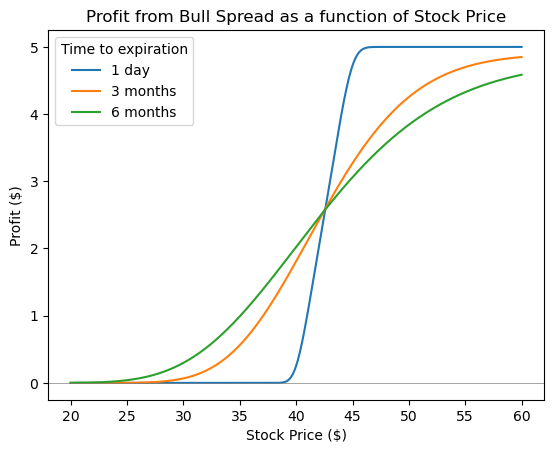

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def european_call_price_dividend(S, E, T, r, rho, sigma):
    d1 = (np.log(S / E) + (r - rho + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    price = S * np.exp(-rho * T) * norm.cdf(d1) - E * np.exp(-r * T) * norm.cdf(d2)
    return price

# Parameters
S = 40  
sigma = 0.30 
r = 0.08  
rho = 0  
T = 0.5  
K_buy = 40  
K_sell = 45  

stock_prices = np.linspace(20, 60, 400)
time_points = [1/365, 3/12, 0.5]  
time_labels = ["1 day", "3 months", "6 months"]  

fig, ax = plt.subplots()
for T, label in zip(time_points, time_labels):
    call_buy_prices = european_call_price_dividend(stock_prices, K_buy, T, r, rho, sigma)
    call_sell_prices = european_call_price_dividend(stock_prices, K_sell, T, r, rho, sigma)
    bull_spread_profit = call_buy_prices - call_sell_prices

    ax.plot(stock_prices, bull_spread_profit, label=label)

ax.axhline(0, color='grey', lw=0.5)
ax.legend(title='Time to expiration')
ax.set_xlabel('Stock Price ($)')
ax.set_ylabel('Profit ($)') 
ax.set_title('Profit from Bull Spread as a function of Stock Price')

plt.show()


### Problem 12.20

In [145]:
import pandas as pd
import numpy as np
from scipy.stats import norm

def european_call_price_dividend( S, E, T, r, rho, sigma):
    d1 = (np.log(S / E) + (r - rho + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    price = S * np.exp(- rho * T) * norm.cdf(d1) - E * np.exp(-r * T) * norm.cdf(d2)
    return price

def european_put_price_dividend(S, E, T, r, rho, sigma):
    d1 = (np.log(S / E) + (r - rho + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    price = E * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(- rho * T) * norm.cdf(-d1)
    return price

# Example usage
S = 100
E = 90
T1 = 1
r = 0.08
sigma = 0.3
rho = 0.05


call_price1 = european_call_price_dividend(S, E, T1, r, rho, sigma)

print(f"The black scholes price of the call is: ${call_price1:.2f}")

The black scholes price of the call is: $17.70


In [146]:
import pandas as pd
import numpy as np
from scipy.stats import norm

def european_call_price_dividend( S, E, T, r, rho, sigma):
    d1 = (np.log(S / E) + (r - rho + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    price = S * np.exp(- rho * T) * norm.cdf(d1) - E * np.exp(-r * T) * norm.cdf(d2)
    return price

def european_put_price_dividend(S, E, T, r, rho, sigma):
    d1 = (np.log(S / E) + (r - rho + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    price = E * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(- rho * T) * norm.cdf(-d1)
    return price

# Example usage
S = 90
E = 100
T1 = 1
r = 0.05
sigma = 0.3
rho = 0.08


put_price1 = european_put_price_dividend(S, E, T1, r, rho, sigma)

print(f"The black scholes price of the call is: ${put_price1:.2f}")

The black scholes price of the call is: $17.70


The option prices will be the exact same because of the way that we have priced the options. We know the following about the price of the call option and put.
\
\
Given the Black-Scholes formulas for European call and put options:

- Call Option: $c(t) = Se^{-\delta (T-t)} \cdot N(d_1) - Ee^{-r(T-t)} \cdot N(d_2)$
- Put Option: $p(t) = Ee^{-r(T-t)} \cdot N(-d_2) - Se^{-\delta (T-t)} \cdot N(-d_1)$

where $d_1 = \frac{\ln(S / E) + (r - \delta + \sigma^2 / 2)(T-t)}{\sigma \sqrt{T-t}}$ and $d_2 = d_1 - \sigma \sqrt{T-t}$

so when lets leave the call option equation alone but change the Put option equation. $p(t) = Ee^{-r(T-t)}  \cdot N(-d_2) - Se^{-\delta (t-t)} \cdot N(-d_1)$ we plug in the values for the numbers here where S(put) = E(call), E(put) = S(call), r(put) = $\delta$(call),and $\delta$(put) = r(call). so $p(t) = Se^{-\delta(T-t)}  \cdot N(-d_2) - Ee^{-r(t-t)} \cdot N(-d_1)$ then we plug in the values for d1 and d2 and get $d_1 = \frac{\ln(E / S) + (\delta -r + \sigma^2 / 2)(T-t)}{\sigma \sqrt{T-t}}$ and $d_2 = \frac{\ln(E / S) + (\delta - r - \sigma^2 / 2)(T-t)}{\sigma \sqrt{T-t}}$ but with some algebra we get the following $d_1 = - \frac{\ln(S/ E) - (r + \delta  - \sigma^2 / 2)(T-t)}{\sigma \sqrt{T-t}}$ and $d_2 = - \frac{\ln(S / E) + (r - \delta + \sigma^2 / 2)(T-t)}{\sigma \sqrt{T-t}}$ so $-d_1 = d_2(call)$ and $-d_2 = d_1(call)$ then we see that when we plug in the equtions we get $p(t) = Se^{-\delta(T-t)}  \cdot N(d_1) - Ee^{-r(t-t)} \cdot N(d_2)$ and we then see that the call price and the put price will be equal for these values. So this is why when we computed the option prices for these values they were the exact same.